# Word cloud code

### Importing modules 

In [2]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from stop_words import get_stop_words
from PIL import Image
import pandas as pd
import numpy as np
import re

### Setting parameters

In [7]:
#data 
data = pd.read_csv('sub_man.csv')

#cloud 
cloud_color = "magma"      # Set wordcloud color scheme ('Wistia' or 'OrRd' are nice! YlGn is great for ayahuasca!)
cloud_bg_color = "white"    # Set background color ("#182a2a" is a nice, dark green!)

cloud_custom_font = False  # AdobeGothicStd-Bold.otf is nice, missing special chars
#cloud_font_path = "Fonts/"
#cloud_font = "CUTE-FROG.ttf" # 'SpicyRice-Regular.ttf' = LSD. 'Jungle.oft'/'Cute Bunny.otf' = Aya.

cloud_masked = True         # If True: will mask cloud on image set below
cloud_mask = np.array(Image.open("Masks/ma.png"))

cloud_scale = 0             # Scale word size mainly by rank (0) to frequency (1) 
cloud_horizontal = 1        # Ratio of word angles from horizontal (1) to vertical (0) 
bigrams = True

#save 
save = True            # If True: Will save image to directory

filename = "file_man_3"

filename = filename #+ "_cloudcolor-" + cloud_color
filename = filename #+ "_bgcolor-" + cloud_bg_color
# if cloud_custom_font == True:
#     filename = filename + "_font-" + cloud_font


### Pre-processing

Saving file...
File saved as: file_man_3.png
DONE


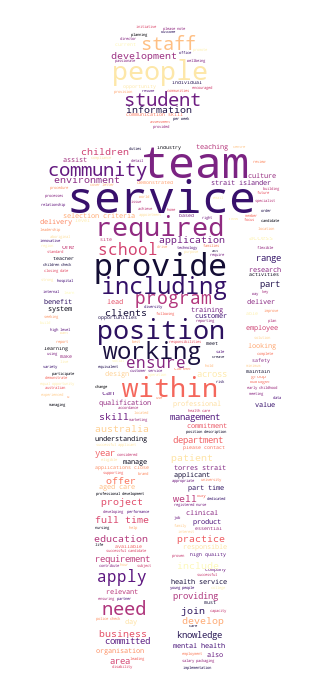

In [8]:
# Pre-processing 
data['text_processed'] = data['Description'].map(lambda x: re.sub('[,\.!?]', '', x)) # Remove punctuation
data['text_processed'] = data['text_processed'].map(lambda x: x.lower()) # Convert to lowercase

# stopwords 
stop_words_en = get_stop_words('en')
stop_words_es = get_stop_words('es')
stop_words_pt = get_stop_words('pt')

stop_words_add = ['experience', 'work', 'will', 'just','got','get', 'â', 'ability', 'role', 'support', 'client']

stop_words = stop_words_en
stop_words.extend(stop_words_es)
stop_words.extend(stop_words_pt)
stop_words.extend(stop_words_add)
stop_words = set(stop_words)


# Generating Wordcloud

#cloud_font = cloud_font_path + cloud_font # Joining font path with font name

long_string = ','.join(list(data['text_processed'].values)) # Join processed text

if cloud_masked == False:   # If True: will plot cloud on image mask; else none
    cloud_mask = None     

if cloud_custom_font == False:   # If True: will plot cloud on image mask; else none
    cloud_font = None     

# Setting up wordcloud from previously set variables.
wordcloud = WordCloud(collocations=bigrams, font_path = cloud_font, mask = cloud_mask, regexp=None, relative_scaling=cloud_scale, prefer_horizontal=cloud_horizontal, width = 500 , height = 500, background_color=cloud_bg_color, max_words=10000, contour_width=0, colormap  =cloud_color, stopwords = stop_words)



# Generating wordcloud. To use tokenized words, use 'wordcloud.generate_from_frequencies'
wordcloud.generate(long_string)

#wordcloud.recolor(color_func="#83c681")

if save == True:            # Save image to path
    print("Saving file...")
    filename = filename + ".png"
    wordcloud.to_file(filename)
    print ("File saved as:", filename)
    print("DONE")


wordcloud.to_image()